In [1]:
# t-sne for training data
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist
import sklearn
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities, _kl_divergence)
from sklearn.utils.extmath import _ravel

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects

RS = 20150101

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context('notebook', font_scale=1.5,
               rc={'lines.linewidth':2.5})


from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy
import imageio
imageio.plugins.ffmpeg.download()

In [2]:
def scatter(x, colors):
    palette = np.array(sns.color_palette('hls', 10))
    
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                   c=palette[colors.astype(np.int)])
    
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    
    txts = [] 
    for i in range(10):
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground='w'),
            PathEffects.Normal()
        ])
        txts.append(txt)
    return f, ax, sc, txts

In [3]:
# data processing

import pandas as pd
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

df = pd.read_csv('/Users/Han/pete/soton/adML/groupwork/train.csv',sep=',')

le = LabelEncoder()
df['Product_Info_2'] = le.fit_transform(df['Product_Info_2'])

col = df.columns
df[col] = df[col].astype('float64')
df.drop('Id',axis=1,inplace=True)
df_length = len(df)
df.isnull().sum()
df.fillna(0, inplace=True)

zeros_dic = {}
for cols in df.columns:
    zeros_value = (df[cols] == float(0)).sum()
    zeros_dic[cols] = zeros_value

percent_dic = {}
for k, v in zeros_dic.items():
    percent_dic[k] = v/df_length
    
filter_list = []
for k,v in percent_dic.items():
    if v > 0.5:
        filter_list.append(k)
        
df.drop(filter_list, axis=1, inplace=True)

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
norm_col = ['Medical_History_1', 'Medical_History_2', 'Employment_Info_2', 'Product_Info_2', 'Product_Info_3']

np_scaled = min_max_scaler.fit_transform(df[norm_col])
#np.unique(df['Product_Info_2'].values)

np_scaled.shape
df_norm = pd.DataFrame(np_scaled, columns=['Medical_History_1_norm', 'Medical_History_2_norm', 'Employment_Info_2_norm', 'Product_Info_2_norm', 'Product_Info_3_norm'])
df.join(df_norm)
df.drop(['Medical_History_1', 'Medical_History_2', 'Employment_Info_2', 'Product_Info_2', 'Product_Info_3'],axis=1, inplace=True)




In [5]:
# prepare data
df.head()

y = df.Response
col = df.columns
x_feature = df[col[:-1]]
random_state = 1

# first 1000 row for t-sne
insurance_proj = TSNE(random_state=1).fit_transform(x_feature[:2000])
y_proj = y[:2000]

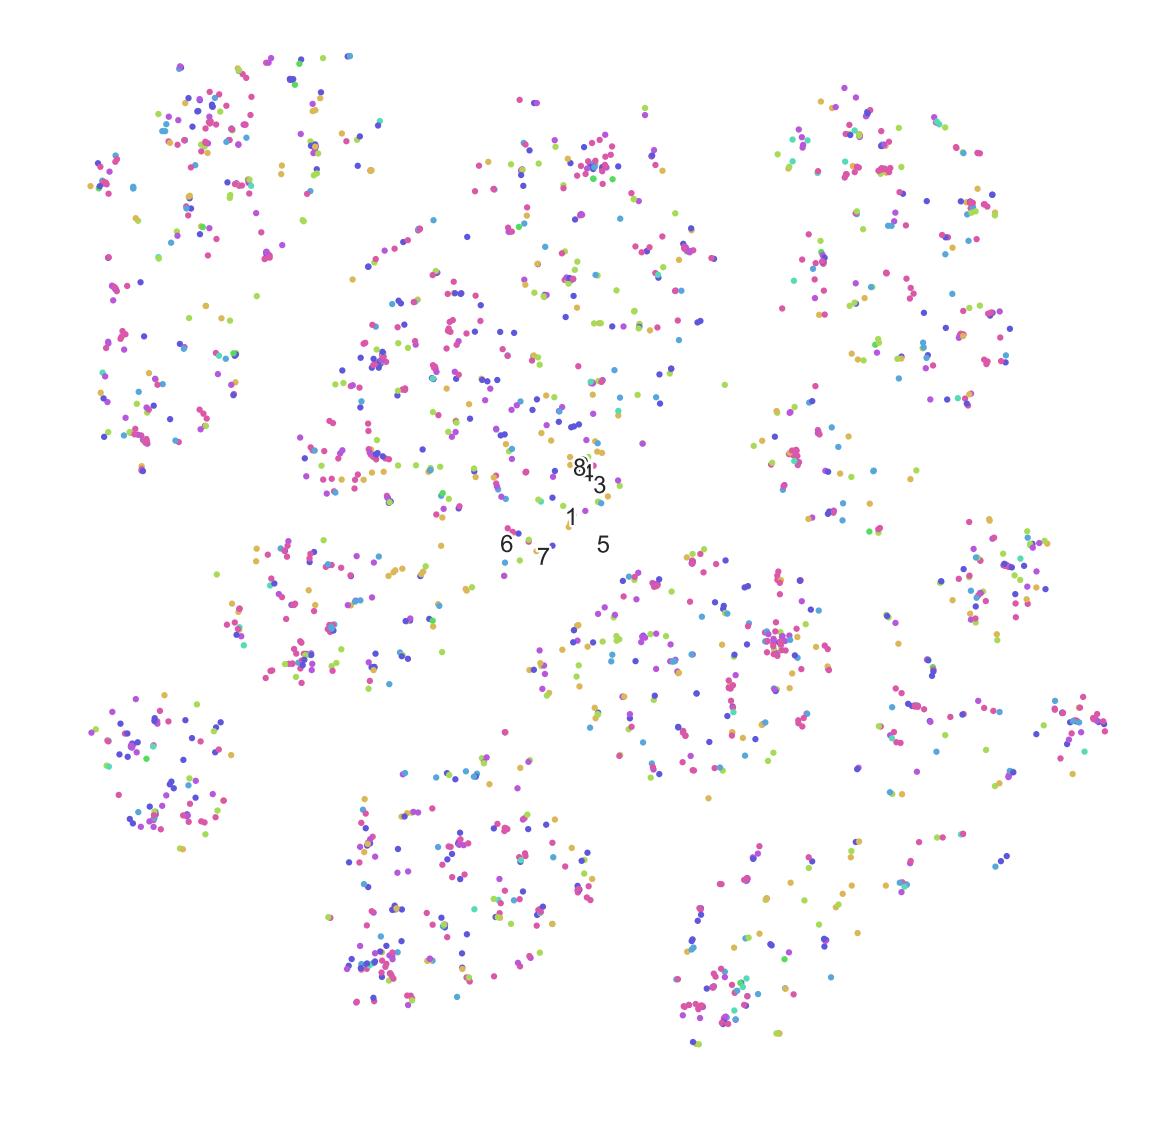

In [6]:
palette = np.array(sns.color_palette('hls', 9))

f = plt.figure(figsize=(20, 20))
ax = plt.subplot(aspect='equal')
sc = ax.scatter(insurance_proj[:,0], insurance_proj[:,1], lw=0, s=40,vmin=0, vmax=0.6,
               c=palette[y_proj.astype(np.int)])

plt.xlim(-25, 25)
plt.ylim(-25, 25)
ax.axis('off')
ax.axis('tight')

txts = [] 
for i in range(1,9):
    xtext, ytext = np.median(insurance_proj[y_proj == i, :], axis=0)
    txt = ax.text(xtext, ytext, str(i), fontsize=24)
    txt.set_path_effects([
        PathEffects.Stroke(linewidth=5, foreground='w'),
        PathEffects.Normal()
    ])
    txts.append(txt)
plt.show()